# Data Cleaning

In [2]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

import glob
import datetime
import gmaps
import matplotlib.pyplot as plt

In [3]:
path = "../Resources/Airbnb/Current_Listing/listings.csv"
hotel_path = "../Resources/Hotel/hotel_data.csv"
listing_df = pd.read_csv(path, low_memory = False)
hotel_df = pd.read_csv(hotel_path)
hotel_df.head()

,City,District,ADR,Month
0,Manhattan,Battery Park City,$100,Jun-18
1,Manhattan,Chelsea,$100,Jun-18
2,Manhattan,East Village,$100,Jun-18
3,Manhattan,Greenwich Village,$100,Jun-18
4,Manhattan,Hell's Kitchen,$100,Jun-18


In [4]:
cols = ["id", "name", "host_since", 
        "neighbourhood_cleansed", "city", "state", "zipcode", 'latitude', 'longitude',
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', "amenities",
        'price', 'cleaning_fee','minimum_nights', 'maximum_nights',
        'number_of_reviews','review_scores_rating',
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
        'instant_bookable','is_business_travel_ready',
        "host_is_superhost","host_response_time","host_response_rate"]
listing_rdc_df = listing_df[cols]
listing_rdc_df.head()

,id,name,host_since,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,host_is_superhost,host_response_time,host_response_rate
0,2539,Clean & quiet apt home by the park,2008-09-07,Kensington,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,...,10.0,10.0,10.0,10.0,10.0,f,f,f,within an hour,100%
1,2595,Skylit Midtown Castle,2008-09-09,Midtown,New York,NY,10018,40.75362,-73.98377,Apartment,...,9.0,10.0,10.0,10.0,9.0,f,f,f,within a few hours,83%
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,2008-11-25,Harlem,New York,NY,10027,40.80902,-73.94190,Apartment,...,NaN,NaN,NaN,NaN,NaN,f,f,f,within a day,100%
3,3831,Cozy Entire Floor of Brownstone,2008-12-07,Clinton Hill,Brooklyn,NY,11238,40.68514,-73.95976,Guest suite,...,9.0,10.0,10.0,10.0,9.0,f,f,f,within an hour,100%
4,4989,Great 1 bdrm. apartment in the PERFECT location!,2009-01-26,Hell's Kitchen,New York,NY,10036,40.76260,-73.99304,Apartment,...,9.0,10.0,10.0,10.0,9.0,f,f,f,within a day,50%


In [5]:
dropna_cols = ["id", "name", "host_since", 
        "neighbourhood_cleansed", "zipcode", 'latitude', 'longitude','amenities',
        'property_type', 'room_type', 'accommodates',
        'price','minimum_nights', 'maximum_nights',
        'number_of_reviews','review_scores_rating',
        'instant_bookable','is_business_travel_ready',
        "host_is_superhost", 'amenities']
fill_0_cols = ['cleaning_fee']
listing_rdc_dna_df = listing_rdc_df.dropna(subset = dropna_cols)
listing_rdc_dna_df["cleaning_fee"] = listing_rdc_dna_df["cleaning_fee"].fillna("0")

renamed_listing = listing_rdc_dna_df.rename(index=str, columns = {"id":"ID", "name":"AirBnb Name", "host_since":"Host Since", 
        "neighbourhood_cleansed":"Neighbourhood", "zipcode":"Zipcode", 'latitude':"Latitude", 'longitude':"Longitude",'amenities':"Amenities",
        'property_type':"Property Type", 'room_type':"Room Type", 'accommodates':"Accommodates",
        'price':"Price",'minimum_nights':"Min Nights", 'maximum_nights':"Max Nights",
        'number_of_reviews':"# of Reviews",'review_scores_rating':"Review Score", "host_response_time":"Host Response Time","host_response_rate":"Host Response Rate",
        'instant_bookable':"Instant Bookable",'is_business_travel_ready':"Business Travel Ready",
        "host_is_superhost":"Superhost", "city":"City", "state":"State", "zipcode":"Zipcode",
        'bathrooms':"Bathrooms", 'bedrooms':"Bedrooms", "cleaning_fee": "Cleaning Fee",
        'review_scores_accuracy': "Accuracy", 'review_scores_cleanliness': "Cleanliness", 'review_scores_checkin': "Check-In Review", 'review_scores_communication':"Communication Review", 
        'review_scores_location':"Location Review", 'review_scores_value':"Value Review"})
renamed_listing.count()

/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


ID                       37261
AirBnb Name              37261
Host Since               37261
Neighbourhood            37261
City                     37219
State                    37259
Zipcode                  37261
Latitude                 37261
Longitude                37261
Property Type            37261
Room Type                37261
Accommodates             37261
Bathrooms                37217
Bedrooms                 37242
Amenities                37261
Price                    37261
Cleaning Fee             37261
Min Nights               37261
Max Nights               37261
# of Reviews             37261
Review Score             37261
Accuracy                 37218
Cleanliness              37235
Check-In Review          37199
Communication Review     37223
Location Review          37196
Value Review             37196
Instant Bookable         37261
Business Travel Ready    37261
Superhost                37261
Host Response Time       27026
Host Response Rate       27026
dtype: i

In [6]:
#Removing $ and , from Price and Cleaning Fee to convert them to float
renamed_listing["Price"] = renamed_listing["Price"].str.replace('$', '')
renamed_listing["Cleaning Fee"] = renamed_listing["Cleaning Fee"].str.replace('$', '')
renamed_listing["Price"] = renamed_listing["Price"].str.replace(',', '')
renamed_listing["Cleaning Fee"] = renamed_listing["Cleaning Fee"].str.replace(',', '')

renamed_listing[["Price", "Cleaning Fee"]] = renamed_listing[["Price", "Cleaning Fee"]].apply(pd.to_numeric)
renamed_listing.dtypes

ID                         int64
AirBnb Name               object
Host Since                object
Neighbourhood             object
City                      object
State                     object
Zipcode                   object
Latitude                 float64
Longitude                float64
Property Type             object
Room Type                 object
Accommodates               int64
Bathrooms                float64
Bedrooms                 float64
Amenities                 object
Price                    float64
Cleaning Fee             float64
Min Nights                 int64
Max Nights                 int64
# of Reviews               int64
Review Score             float64
Accuracy                 float64
Cleanliness              float64
Check-In Review          float64
Communication Review     float64
Location Review          float64
Value Review             float64
Instant Bookable          object
Business Travel Ready     object
Superhost                 object
Host Respo

In [7]:
#Cleansing Data Further

#Minimum Rating Score of 80
clean_airbnb = renamed_listing[renamed_listing["Review Score"] >= 80].copy()

#Cleanliness & Location Accuracy Should be at least 8
clean_airbnb = clean_airbnb[(clean_airbnb["Cleanliness"] >= 8) & (clean_airbnb["Location Review"] >=8)].copy()

#Total Price combining Cleaning Fee w/ Price
clean_airbnb["Total Price"] = clean_airbnb["Price"] + clean_airbnb["Cleaning Fee"]
clean_airbnb.dtypes

clean_airbnb["Price Per Person"] = round(clean_airbnb["Total Price"]/clean_airbnb["Accommodates"], 2)

print(clean_airbnb[['Price', 'Cleaning Fee', 'Total Price', 'Price Per Person']].head())

   Price  Cleaning Fee  Total Price  Price Per Person
0  149.0          25.0        174.0             87.00
1  225.0         100.0        325.0            162.50
3   89.0           0.0         89.0             29.67
4  105.0          25.0        130.0             65.00
5   80.0          80.0        160.0            160.00


In [8]:
#Selecting only Manhattan Addresses
zipcodes = ["10026", "10027", "10030", "10037", "10039", "10001", "10011", "10018", "10019", "10020", "10036",
           "10029", "10035", "10010", "10016", "10017", "10022", "10012", "10013", "10014", 
           "10004", "10005", "10006", "10007", "10038", "10280", "10002", "10003", "10009", 
           "10021", "10028", "10044", "10065", "10075", "10128", "10023", "10024", "10025", 
           "10031", "10032", "10033", "10034", "10040"]


manhattan_airbnb = clean_airbnb[clean_airbnb['Zipcode'].isin(zipcodes)]

clean_airbnb = manhattan_airbnb

clean_airbnb.count()

ID                       14706
AirBnb Name              14706
Host Since               14706
Neighbourhood            14706
City                     14706
State                    14705
Zipcode                  14706
Latitude                 14706
Longitude                14706
Property Type            14706
Room Type                14706
Accommodates             14706
Bathrooms                14688
Bedrooms                 14694
Amenities                14706
Price                    14706
Cleaning Fee             14706
Min Nights               14706
Max Nights               14706
# of Reviews             14706
Review Score             14706
Accuracy                 14704
Cleanliness              14706
Check-In Review          14706
Communication Review     14704
Location Review          14706
Value Review             14704
Instant Bookable         14706
Business Travel Ready    14706
Superhost                14706
Host Response Time       10467
Host Response Rate       10467
Total Pr

In [9]:
#Using Zipcodes to create Neighborhoods to be used for visuals
regions = {"Central Harlem":["10026", "10027", "10030", "10037", "10039"],
    "Chelsea and Clinton":["10001", "10011", "10018", "10019", "10020", "10036"],
    "East Harlem":["10029", "10035"],
    "Gramercy Park and Murray Hill":["10010", "10016", "10017", "10022"],
    "Greenwich Village and Soho":["10012", "10013", "10014"],
    "Lower Manhattan":["10004", "10005", "10006", "10007", "10038", "10280"],
    "Lower East Side":["10002", "10003", "10009"],
    "Upper East Side":["10021", "10028", "10044", "10065", "10075", "10128"],
    "Upper West Side":["10023", "10024", "10025"],
    "Inwood and Washington Heights":["10031", "10032", "10033", "10034", "10040"]
          }

for index, row in clean_airbnb.iterrows():
    for key, value in regions.items():
        if row["Zipcode"] in value:
            region = key
            clean_airbnb.loc[index, "Region"] = region
        
clean_airbnb.head()


,ID,AirBnb Name,Host Since,Neighbourhood,City,State,Zipcode,Latitude,Longitude,Property Type,...,Location Review,Value Review,Instant Bookable,Business Travel Ready,Superhost,Host Response Time,Host Response Rate,Total Price,Price Per Person,Region
1,2595,Skylit Midtown Castle,2008-09-09,Midtown,New York,NY,10018,40.75362,-73.98377,Apartment,...,10.0,9.0,f,f,f,within a few hours,83%,325.0,162.5,Chelsea and Clinton
4,4989,Great 1 bdrm. apartment in the PERFECT location!,2009-01-26,Hell's Kitchen,New York,NY,10036,40.76260,-73.99304,Apartment,...,10.0,9.0,f,f,f,within a day,50%,130.0,65.0,Chelsea and Clinton
5,5022,Entire Apt: Spacious Studio/Loft by central park,2009-01-29,East Harlem,New York,NY,10029,40.79851,-73.94399,Apartment,...,9.0,10.0,f,f,f,within an hour,100%,160.0,160.0,East Harlem
6,5099,Large Cozy 1 BR Apartment In Midtown East,2009-02-02,Murray Hill,New York,NY,10016,40.74767,-73.97500,Apartment,...,9.0,9.0,t,f,f,within an hour,100%,325.0,162.5,Gramercy Park and Murray Hill
9,5203,Cozy Clean Guest Room - Family Apt,2009-02-05,Upper West Side,New York,NY,10025,40.80178,-73.96723,Apartment,...,10.0,10.0,f,f,f,NaN,NaN,79.0,79.0,Upper West Side


In [10]:
clean_airbnb["Region"].value_counts()

Chelsea and Clinton              2574
Lower East Side                  2501
Central Harlem                   1555
Inwood and Washington Heights    1438
Greenwich Village and Soho       1394
Upper West Side                  1375
Gramercy Park and Murray Hill    1331
Upper East Side                  1246
East Harlem                       788
Lower Manhattan                   504
Name: Region, dtype: int64

# Airbnb Data Cleaning

# Airbnb Historic Data  
### 1. Number of Listing

In [9]:
# a function that get rid of the "day" from "host-since", fill a new col with host-since "yyyy-mm"
def parse_yyyy_mm(start, end):
    for i in range(start, end):
        try: 
            historic_num_listing_df.loc[i, 'yyyy-mm'] = historic_num_listing_df.loc[i, 'host_since'][:7]
        except: 
            print(f"Row {i} failed        ", end = '\r' )
    return historic_num_listing_df

In [11]:
# load only the relevant cols and create a new DataFrame
historic_num_listing_col = ['id','host_since','city', 'latitude', 'longitude']
historic_num_listing_df = listing_rdc_df[historic_num_listing_col].dropna()
historic_num_listing_df['yyyy-mm'] = ''

# since there are too many rows
# break the huge operation into groups, each group with 200 rows
# loop through all the rows group by group
list_range = np.arange(0, len(historic_num_listing_df), 200)

for i in range(len(list_range)-1):
    historic_num_listing_df = parse_yyyy_mm(list_range[i], list_range[i + 1])
    print(f"Each group runs 200 rows, now in group {i} /{len(list_range) - 2}                ", end = "\r")
    
historic_num_listing_df = parse_yyyy_mm(list_range[-1], len(listing_df))

In [12]:
# get the "new listing this month" and "total listing up to this month", and create a DataFrame
historic_host_since_count_df = historic_num_listing_df.groupby("yyyy-mm").count()["latitude"].reset_index()
historic_host_since_count_df.rename(columns = {"latitude": 'new listing this month'}, inplace = True)

# create 2 new cols, separating "yyyy" and "mm"
historic_host_since_count_df['yyyy'] = ""
historic_host_since_count_df['mm'] = ''
for index, row in historic_host_since_count_df.iterrows():
    historic_host_since_count_df.iloc[index, 2] = int(row['yyyy-mm'].split("-")[0])
    historic_host_since_count_df.iloc[index, 3] = int(row['yyyy-mm'].split("-")[1])
listing_groupby_yyyy_mm_df = historic_host_since_count_df.groupby(["yyyy",'mm']).sum()

# calculate accumulated listing, and store in new col
listing_groupby_yyyy_mm_df['accumulated listing up to this month'] = ''
for i in range(len(listing_groupby_yyyy_mm_df)):
    if i == 0:
        listing_groupby_yyyy_mm_df.iloc[i, 1] = listing_groupby_yyyy_mm_df.iloc[i, 0] 
    else:
        listing_groupby_yyyy_mm_df.iloc[i, 1] = (listing_groupby_yyyy_mm_df.iloc[i-1, 1] +
                                                listing_groupby_yyyy_mm_df.iloc[i, 0])

# create a list of host_since time stamps based on month 
# for better looking xtick_labels
months = ['Jan', "Feb", 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
host_since_list = [months[int(x.split("-")[1]) -1] + " " + x.split("-")[0]
                   for x in sorted(historic_num_listing_df['yyyy-mm'].unique()) if x != ""]    

In [13]:
# now the listing ("new listing this month" & "accumulated listing count") are group by "yyyy-mm"
listing_groupby_yyyy_mm_df.head(10)

new listing this month  accumulated listing up to this month
yyyy mm                                                              
2008 8                        3                                     3
     9                       13                                    16
     10                       6                                    22
     11                       3                                    25
     12                       3                                    28
2009 1                        5                                    33
     2                       21                                    54
     3                       15                                    69
     4                       15                                    84
     5                       23                                   107

/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


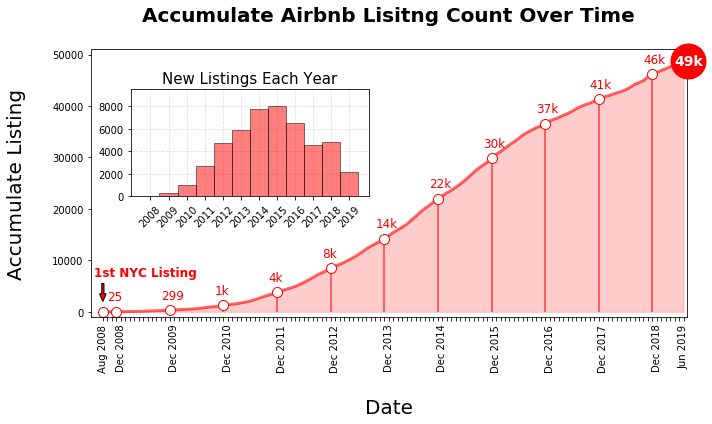

In [14]:
# year end new listing count
listing_groupby_yyyy_mm_df.reset_index(inplace = True)
historic_year_list = list(listing_groupby_yyyy_mm_df['yyyy'].unique())
year_end_listing_cnt_dict = {}
for yr in historic_year_list:
    df = listing_groupby_yyyy_mm_df[listing_groupby_yyyy_mm_df['yyyy'] == yr]   
    if yr not in year_end_listing_cnt_dict.keys():
        year_end_listing_cnt_dict[yr] = df['new listing this month'].sum()   

accumulate_list = listing_groupby_yyyy_mm_df['accumulated listing up to this month']
fig, ax1 = plt.subplots(figsize = (10,6))
plt.grid(False)
plt.xlim(-2.75, len(accumulate_list)-0.25)

# ---------------- creat a plot of historic listing data ----------------

# axis setup
ax1.set_axisbelow(True)
ax1.set_xticks(np.arange(0,len(accumulate_list),1))
ax1.set_ylim(-1000, 5.1e4)
xticklabel = [host_since_list[i] if (i == 0 or 
                                     (i-4)%12 ==0 or 
                                     i == len(host_since_list) -1) 
              else "" for i in range(len(host_since_list))]
ax1.set_xticklabels(xticklabel, rotation = 90)
ax1.set_xlabel("\nDate", fontsize=20)
plt.ylabel("Accumulate Listing\n", fontsize=20)
plt.title("Accumulate Airbnb Lisitng Count Over Time\n", fontsize = 20, weight = 'bold')

# plot accumulate historic data (line plot)
x1 = [0]+ list(np.arange(3, len(accumulate_list) + 12, 12)) # major tick label location 
# Line plot
ax1.plot(np.arange(len(accumulate_list)),
                 listing_groupby_yyyy_mm_df["accumulated listing up to this month"],
                color = 'r', alpha = 0.6 , linewidth = 3)
# End of the year marker
ax1.plot(x1,listing_groupby_yyyy_mm_df["accumulated listing up to this month"][x1],'o', 
         markersize = 10, mfc = 'white', mec = 'r')
current_marker = len(accumulate_list)
ax1.plot(current_marker,listing_groupby_yyyy_mm_df["accumulated listing up to this month"][current_marker-1],
         'o', markersize = 35, mfc = 'r', mec = 'r',clip_on=False,zorder=100)
# fill below line plot
ax1.fill_between(np.arange(len(accumulate_list)),0, 
                 listing_groupby_yyyy_mm_df["accumulated listing up to this month"],
                color = 'r', alpha = 0.2)
# end of the year vertical separator
ax1.vlines(x1, 0, listing_groupby_yyyy_mm_df["accumulated listing up to this month"][x1], 'r', alpha = 0.7)

# text annotation 
t1 = ax1.text(-2, 7e3, '1st NYC Listing', color = 'r', fontsize = 12, weight = 'bold')
ax1.arrow(0, 5.5e3, 0, -2e3, width = 0.5, head_length = 1.5e3, fc= 'r', ec = 'k')
for i in x1[1:-1]:
    ax1.text(i - 2,2.2e3+listing_groupby_yyyy_mm_df["accumulated listing up to this month"][i],
             (listing_groupby_yyyy_mm_df["accumulated listing up to this month"][i] if 
              listing_groupby_yyyy_mm_df["accumulated listing up to this month"][i] < 1e3
             else "{:.0f}k".format(listing_groupby_yyyy_mm_df["accumulated listing up to this month"][i] / 1e3) ), 
             color = 'r', fontsize = 12)
# the current total listing, big bubble label
ax1.text(current_marker-3.1,-9e2+ listing_groupby_yyyy_mm_df["accumulated listing up to this month"][current_marker-1],
             ("{:.0f}k".format(listing_groupby_yyyy_mm_df["accumulated listing up to this month"][current_marker-1] 
                               / 1e3)), 
             color = 'w', fontsize = 14, weight = 'bold',clip_on=False,zorder=100) 

# -------------------------------- inset plot -------------------------------- 

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
year_end_list = [v for k,v in year_end_listing_cnt_dict.items()] # inset plot xlabel
# inset plot axis
axins = inset_axes(ax1, width="40%", height="40%", loc=2, borderpad=4) # insert inset plot
axins.grid(True, linestyle = "dashed", alpha = 0.4)
axins.set_axisbelow(True)
# plot bar chart, new listing per year 
axins.bar(year_end_listing_cnt_dict.keys(), year_end_list, color = 'r', edgecolor = 'k',alpha = 0.5, width = 1)
# house keeping, axis, ticks, ect.
axins.set_xticks(list(year_end_listing_cnt_dict.keys()))
axins.set_xticklabels(list(year_end_listing_cnt_dict.keys()), rotation = 45)
axins.set_title("New Listings Each Year", fontsize = 15)
axins.set_ylim(0, 9500)
    
plt.tight_layout()
plt.savefig(f"../Output/Historic_Accumulate_Listing_Count_ALLTIME.png")
plt.show()

### 2. Google Map listing animation

In [15]:
%matplotlib notebook

# a function that grabs the rows based on filtering condition
# return result as a DataFrame
def get_data(table,yyyy_mm,cols):
    data = table[table['yyyy-mm'] == yyyy_mm][cols] #
    data.reset_index(drop = True, inplace = True)
    return data

# customize wait time for webbrowser driver (more (lat,lng) points will load longer)
def wait_time(month):
    if int(month[:4]) < 2012:
        waittime = 1
    elif int(month[:4]) < 2014:
        waittime = 3
    elif int(month[:4]) < 2016:
        waittime = 5
    elif int(month[:4]) < 2017:
        waittime = 8
    else:
        waittime = 10
    return waittime

#### 1) Generate the animation files
##### `Please Note !... `
The following `3 CELLS` (source code to generate "HTML" and ".png" files) are shown as Raw. `You don't need to,` but in case if you want to regenerate those files, you can mark these 3 cells as `Code`, and rerun them.

#### 2) Display the animation -- There are 2 options
 1)  inline display -- mark the following cell as "Code", then run it

2) Save as movie in terminal, and display in Jupyter Notebook
1. install ffmpeg or imagemagick
2. open terminal, navagate to the folder with image sequence
3. run `ffmpeg -i frame%07d.png airbnb_listing.webm -r 5 -s 1920x1080 -vcodec libx264 -crf 25  -pix_fmt yuv420p`  
   or `magick convert -i *.png airbnb_listing.gif` 
    
4. display `.webm` or `.gif` in Jupyter Notebook

In [20]:
# run this to see the animation 
from IPython.display import HTML
path = f"../Output/Historic_Airbnb_listing.webm"
Video(path)

### 3. Historic Price

In [21]:
# load the ".csv" files from another source, creat a data frame for each file
historic_folder_path = "../Resources/Airbnb/New_York_Historic_Data/*.csv"
# get all files available, and put those in a list
historic_file_paths = glob.glob(historic_folder_path)

# get the cols needed
dates = []
historic_cols = ["room_type", 'borough', 'accommodates','price','latitude','longitude', 'last_modified']

historic_df = pd.DataFrame(columns=['date', 
                                    'price', 
                                    'entire_apt_count', 
                                    'private_room_count', 
                                    'share_room_count', 
                                    'Total count'])

# read each ".csv" and process DataFrame
i = 0
for path in sorted(historic_file_paths):#sorted(historic_file_paths):
    # date in yyyy-mm-dd
    date = path.split("/")[-1].split("_")[-1].split(".")[0].replace("-","_")
    dates.append(date)
    
    # DataFrame 
    df = pd.read_csv(path)
    df_rdc = df[historic_cols]
    df_rdc['last_modified'] = date
    historic_df.loc[i] = [date,
                          round(df_rdc['price'].mean(),2), 
                          df_rdc.groupby("room_type").count().iloc[0,2], 
                          df_rdc.groupby("room_type").count().iloc[1,2], 
                          df_rdc.groupby("room_type").count().iloc[2,2], 
                          df_rdc.count()['price']]
    i += 1

/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


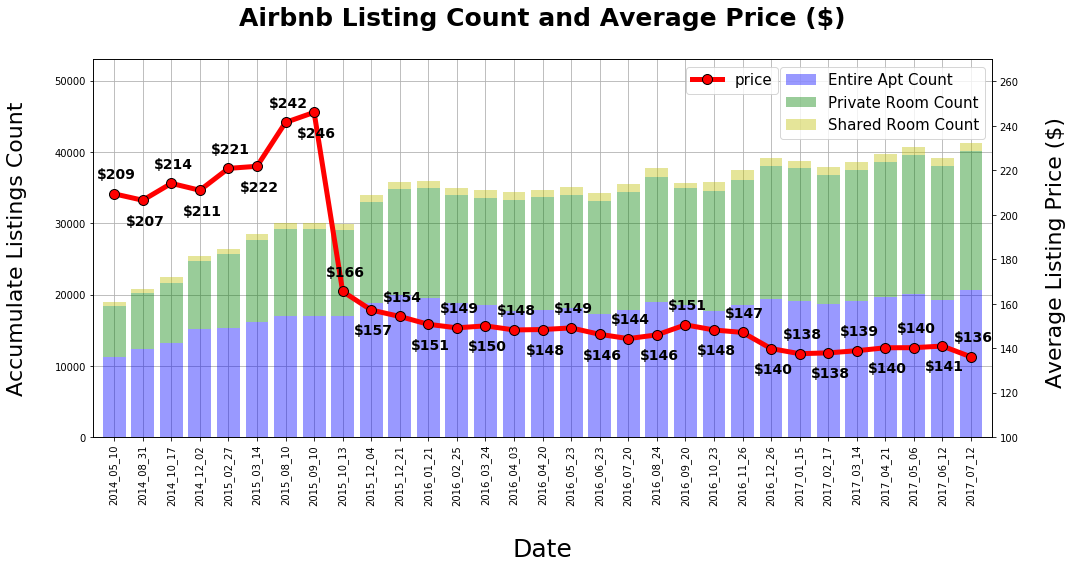

In [22]:
%matplotlib inline

x = np.arange(historic_df.count()[1])

fig, ax1 = plt.subplots(figsize = (15,8))

# set axis properties
plt.grid(True)
ax1.set_axisbelow(True)
plt.xlim(-0.75, len(x) - 0.25)
ax1.set_ylim(0, 53000)
ax1.set_xticks(np.arange(historic_df.count()[1]))
ax1.set_xticklabels(historic_df['date'], rotation = 90)
ax1.set_xlabel("\nDate", fontsize = 25)
ax1.set_ylabel("Accumulate Listings Count\n", fontsize = 22)

# plot stacked bar=chart, acuumulated listing count based on room-type
ax1.bar(x, historic_df['entire_apt_count'], color = 'blue', label = 'Entire Apt Count', alpha = 0.4)
ax1.bar(x, historic_df['private_room_count'],
        bottom=historic_df['entire_apt_count'], color = 'green', label = 'Private Room Count', alpha = 0.4)
ax1.bar(x, historic_df['share_room_count'],
        bottom=historic_df['private_room_count'] + historic_df['entire_apt_count'],
        color = 'y', label = 'Shared Room Count', alpha = 0.4)

ax1.legend(loc = 1, prop={'size': 15})

# plot price line on top of the bar chart
ax2 = ax1.twinx()
ax2.set_ylim(100, 270)
ax2.set_ylabel("\nAverage Listing Price ($) ", fontsize = 22)

ax2.plot(x, historic_df['price'], 'ro-', markersize = 10, mec = 'k', linewidth = 5, label = 'price')

# customize priceing annotation
for i in range(len(x)):
    if i % 2 == 0:
        ax2.text(x[i] - 0.6, historic_df['price'][i] + 7, "${:.0f}".format(historic_df['price'][i]) , 
             fontsize = 14,weight='bold')
    else:
        ax2.text(x[i] - 0.6, historic_df['price'][i] - 11, "${:.0f}".format(historic_df['price'][i]) , 
             fontsize = 14,weight='bold')
    
# final plot properties and save figure
plt.title("Airbnb Listing Count and Average Price ($)\n", fontsize = 25, weight = "bold")
plt.legend(bbox_to_anchor=(0.77, 1), prop={'size': 15})

plt.tight_layout()
plt.savefig(f"../Output/Histroric_Listing_Count_and_Average_Price.png")
plt.show()

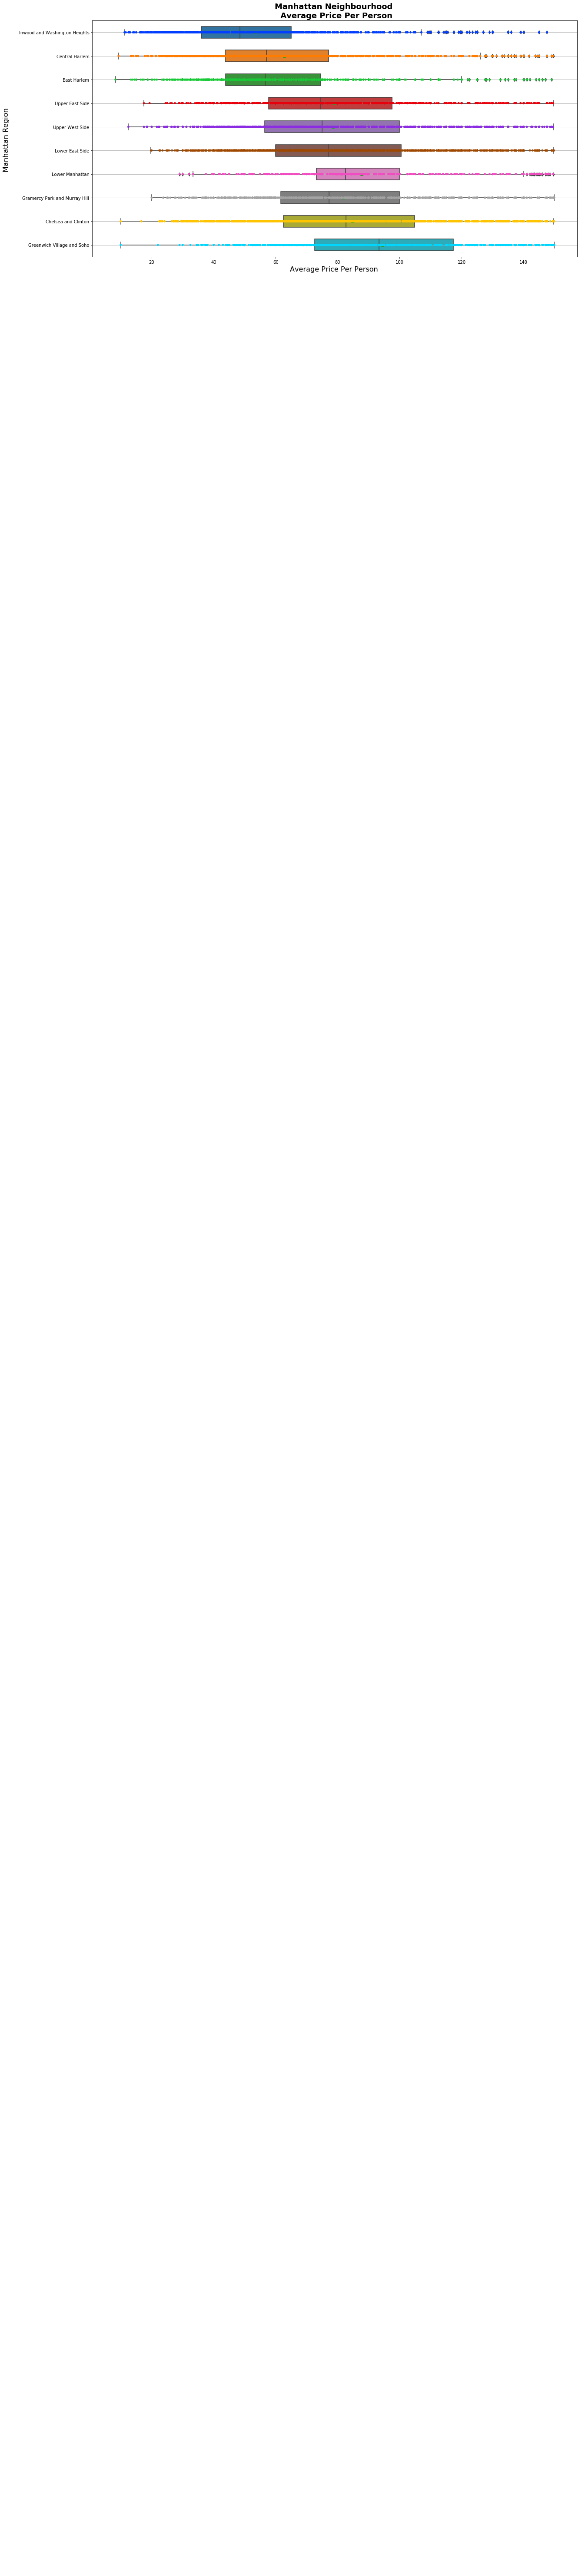

In [23]:
import seaborn as sns

city_df = clean_airbnb.loc[clean_airbnb['City'] == 'New York']

city_df = city_df[city_df['Price Per Person'] < 150].copy()

# Calculate number of obs per group & median to position labels
means = clean_airbnb.groupby(['Region'])['Price Per Person'].median()
sorted_regions = means.sort_values().index
nobs = [str(x) for x in means.tolist()]
nobs = ["Mean $:" + i for i in nobs]

f, ax = plt.subplots(1, 1, sharey=True, figsize=(20, 10))

ax =sns.boxplot(x='Price Per Person', y='Region', data= city_df, width=0.5, 
                  showmeans=True, order = sorted_regions)
                  
ax =sns.stripplot(x='Price Per Person', y='Region',data= city_df, jitter=False, palette = 'bright',
                  color = 'blue', order = sorted_regions)                  

plt.title('Manhattan Neighbourhood \n Average Price Per Person', fontsize=18, weight='bold')
plt.ylabel('Manhattan Region \n', fontsize= 16)
plt.xlabel('Average Price Per Person \n', fontsize= 16)
ax.yaxis.grid(True)

# set color
#plt.setp(bp['boxes'], color='green')
#plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='*')


# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], means[tick] + 0.03, nobs[tick],
   horizontalalignment='center', size='medium', color='w', weight='bold')

plt.savefig("priceperregion.png")
    
    

In [ ]:

manhattan_data= clean_airbnb.loc[clean_airbnb['City'] == 'Manhattan']

neighbour_avg_price = manhattan_data.groupby('Neighbourhood')['Price'].mean()

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral", "red", "green"]

#Only explode the third section of the pie chart.
explode = (0, 0, 0, 0.1, 0)

#Create the pie chart.
plt.pie(neighbour_avg_price, labels = neighbour_avg_price.index, autopct = "%1.2f%%", colors = colors, 
        explode = explode, shadow = True, startangle = 90)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")
plt.title('Manhattan neighbourhood average price')
#Add the legend.
#plt.legend(loc = "best")
plt.show()